In [48]:
from src.tokenizers import *
import os
from src.sascorer import *

from rdkit.Chem import MolFromSmiles, QED

from IPython.display import display
import json
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

In [2]:

tokenizer = GroupSelfiesTokenizer("tokens/zinc_gs_grammar.txt")

In [49]:

def score_smile(s):
    mol = Chem.MolFromSmiles(s)
    sa = calculateScore(mol)
    qed = QED.qed(mol)
    return sa, qed

def print_info_gs(s, sa, qed):
    enc = tokenizer.encoder(s)
    mol= tokenizer.grammar.decoder(enc)
    print("SA", sa)
    print("QA", )
    print("GroupSelfies: ", enc)
    print("Selfies: ", sf.encoder(s))
    display(mol)

# GEN PROPERTIES DATASET

In [82]:
smiles = [line.split()[0] for line in open("tokens/zinc250k.smi", 'r')]
d = {}
for s in tqdm.tqdm(smiles):
    sa, qed = score_smile(s)
    d[Chem.CanonSmiles(s)] = {"sa": sa,"qed": qed}

100%|██████████| 249347/249347 [10:40<00:00, 389.39it/s]


TypeError: dump() missing 1 required positional argument: 'fp'

In [83]:

with open("data/zinc250k.json", "w") as f:
    json.dump(d, f)

# GEN RANDOM MOLS

In [64]:
gen_mols = pickle.load(open("gen_mols/random/selfies.pkl","rb"))

props = []
for i in range(len(gen_mols)):
    sa, qed = score_smile(gen_mols[i])
    props.append([0, sa, qed])

props_sf = np.array(props)

gen_mols = pickle.load(open("gen_mols/random/gs_zinc.pkl","rb"))

props = []
for i in range(len(gen_mols)):
    sa, qed = score_smile(gen_mols[i])
    props.append([0, sa, qed])

props_gs_zinc = np.array(props)

gen_mols = pickle.load(open("gen_mols/random/gs_um.pkl","rb"))

props = []
for i in range(len(gen_mols)):
    sa, qed = score_smile(gen_mols[i])
    props.append([0, sa, qed])

props_gs_um = np.array(props)

gen_mols = pickle.load(open("gen_mols/random/gs_use.pkl","rb"))

props = []
for i in range(len(gen_mols)):
    sa, qed = score_smile(gen_mols[i])
    props.append([0, sa, qed])

props_gs_use = np.array(props)



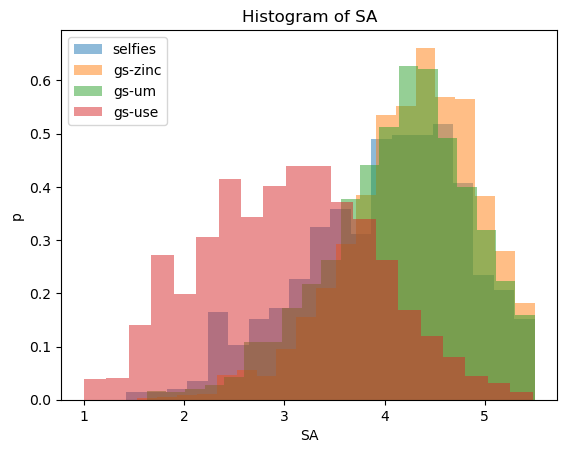

In [65]:
plt.figure()
plt.title("Histogram of SA")
plt.hist(props_sf[(props_sf[:,1]<5.5) & (props_sf[:,2]>0.4), 1], 20, alpha=0.5, density=True, label="selfies")
plt.hist(props_gs_zinc[(props_gs_zinc[:,1]<5.5) & (props_gs_zinc[:,2]>0.4), 1], 20, alpha=0.5, density=True, label="gs-zinc")
plt.hist(props_gs_um[(props_gs_um[:,1]<5.5) & (props_gs_um[:,2]>0.4), 1], 20, alpha=0.5, density=True, label="gs-um")
plt.hist(props_gs_use[(props_gs_use[:,1]<5.5) & (props_gs_use[:,2]>0.4), 1], 20, alpha=0.5, density=True, label="gs-use")
plt.xlabel("SA")
plt.ylabel("p")
plt.legend()
plt.show()

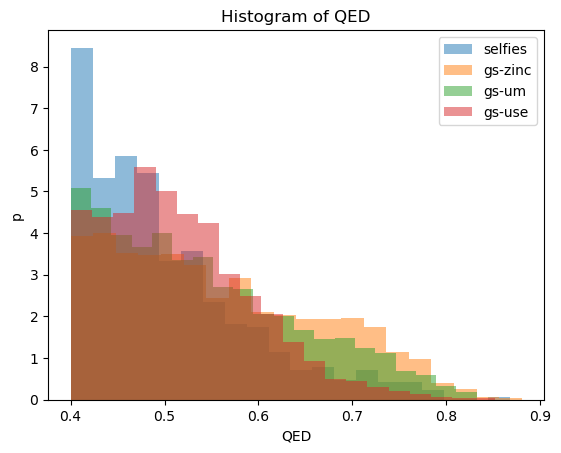

In [67]:
plt.figure()
plt.title("Histogram of QED")
plt.hist(props_sf[(props_sf[:,1]<5.5) & (props_sf[:,2]>0.4), 2], 20, alpha=0.5, density=True, label="selfies")
plt.hist(props_gs_zinc[(props_gs_zinc[:,1]<5.5) & (props_gs_zinc[:,2]>0.4), 2], 20, alpha=0.5, density=True, label="gs-zinc")
plt.hist(props_gs_um[(props_gs_um[:,1]<5.5) & (props_gs_um[:,2]>0.4), 2], 20, alpha=0.5, density=True, label="gs-um")
plt.hist(props_gs_use[(props_gs_use[:,1]<5.5) & (props_gs_use[:,2]>0.4), 2], 20, alpha=0.5, density=True, label="gs-use")
plt.xlabel("QED")
plt.ylabel("p")
plt.legend()
plt.show()

# Gen Mols

In [72]:
gen_mols = pickle.load(open("gen_mols/selfies.pkl","rb"))

props = []
for i in range(len(gen_mols)):
    sa, qed = score_smile(gen_mols[i][1])
    props.append([gen_mols[i][0], sa, qed])

props_sf = np.array(props)

print(len(props_sf))
print("Spearman R; selfies; BA vs SA", spearmanr(props_sf[:,0], props_sf[:,1]))
print("Spearman R; selfies; BA vs QED", spearmanr(props_sf[:,0], props_sf[:,2]))

gen_mols = pickle.load(open("gen_mols/gs_zinc.pkl","rb"))

props = []
for i in range(len(gen_mols)):
    sa, qed = score_smile(gen_mols[i][1])
    props.append([gen_mols[i][0], sa, qed])

props_gs_zinc = np.array(props)


print(len(props_gs_zinc))
print("Spearman R; group-selfies zinc; BA vs SA", spearmanr(props_gs_zinc[:,0], props_gs_zinc[:,1]))
print("Spearman R; group-selfies zinc; BA vs QED", spearmanr(props_gs_zinc[:,0], props_gs_zinc[:,2]))


gen_mols = pickle.load(open("gen_mols/gs_um.pkl","rb"))

props = []
for i in range(len(gen_mols)):
    sa, qed = score_smile(gen_mols[i][1])
    props.append([gen_mols[i][0], sa, qed])

props_gs_um = np.array(props)


print(len(props_gs_um))
print("Spearman R; group-selfies um; BA vs SA", spearmanr(props_gs_um[:,0], props_gs_um[:,1]))
print("Spearman R; group-selfies um; BA vs QED", spearmanr(props_gs_um[:,0], props_gs_um[:,2]))

gen_mols = pickle.load(open("gen_mols/gs_use.pkl","rb"))

props = []
for i in range(len(gen_mols)):
    sa, qed = score_smile(gen_mols[i][1])
    props.append([gen_mols[i][0], sa, qed])

props_gs_use = np.array(props)


print(len(props_gs_use))
print("Spearman R; group-selfies use; BA vs SA", spearmanr(props_gs_use[:,0], props_gs_use[:,1]))
print("Spearman R; group-selfies use; BA vs QED", spearmanr(props_gs_use[:,0], props_gs_use[:,2]))


5862
Spearman R; selfies; BA vs SA SignificanceResult(statistic=-0.03183623001297356, pvalue=0.014785224030567689)
Spearman R; selfies; BA vs QED SignificanceResult(statistic=-0.54830641869693, pvalue=0.0)
5494
Spearman R; group-selfies zinc; BA vs SA SignificanceResult(statistic=-0.23395150671052925, pvalue=3.418489642749458e-69)
Spearman R; group-selfies zinc; BA vs QED SignificanceResult(statistic=-0.3501493220371573, pvalue=3.1750363600435524e-158)
4520
Spearman R; group-selfies um; BA vs SA SignificanceResult(statistic=-0.35712382845681395, pvalue=4.655872438659337e-136)
Spearman R; group-selfies um; BA vs QED SignificanceResult(statistic=-0.3405141599546272, pvalue=4.293904449551466e-123)
2396
Spearman R; group-selfies use; BA vs SA SignificanceResult(statistic=0.032073027004513414, pvalue=0.11652551410543227)
Spearman R; group-selfies use; BA vs QED SignificanceResult(statistic=0.2952439233036766, pvalue=2.1260518841965906e-49)


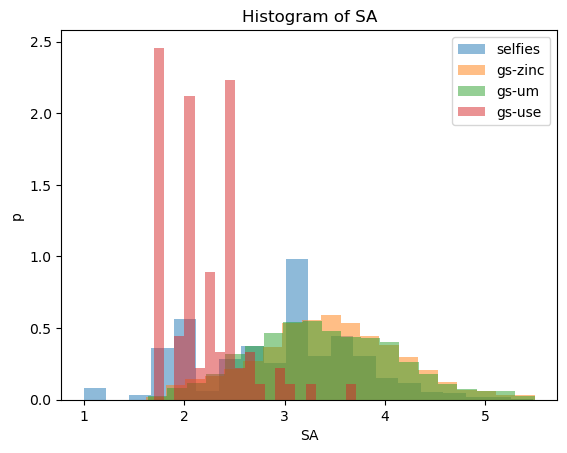

In [79]:
plt.figure()
plt.title("Histogram of SA")
plt.hist(props_sf[(props_sf[:,1]<5.5) & (props_sf[:,2]>0.4), 1], 20, alpha=0.5, density=True, label="selfies")
#plt.axvline(props_sf[(props_sf[:,1]<5.5) & (props_sf[:,2]>0.4), 1].mean(), alpha=0.5, label="selfies")
plt.hist(props_gs_zinc[(props_gs_zinc[:,1]<5.5) & (props_gs_zinc[:,2]>0.4), 1], 20, alpha=0.5, density=True, label="gs-zinc")
#plt.axvline(props_gs_zinc[(props_gs_zinc[:,1]<5.5) & (props_gs_zinc[:,2]>0.4), 1].mean(), alpha=0.5, label="gs-zinc")
plt.hist(props_gs_um[(props_gs_um[:,1]<5.5) & (props_gs_um[:,2]>0.4), 1], 20, alpha=0.5, density=True, label="gs-um")
#plt.axvline(props_gs_um[(props_gs_um[:,1]<5.5) & (props_gs_um[:,2]>0.4), 1].mean(), alpha=0.5, label="gs-um")
plt.hist(props_gs_use[(props_gs_use[:,1]<5.5) & (props_gs_use[:,2]>0.4), 1], 20, alpha=0.5, density=True, label="gs-use")
#plt.axvline(props_gs_use[(props_gs_use[:,1]<5.5) & (props_gs_use[:,2]>0.4), 1].mean(), alpha=0.5, label="gs-use")
plt.xlabel("SA")
plt.ylabel("p")
plt.legend()
plt.show()

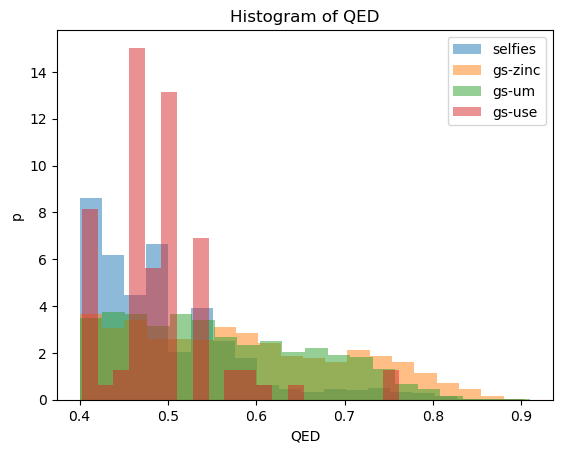

In [74]:
plt.figure()
plt.title("Histogram of QED")
plt.hist(props_sf[(props_sf[:,1]<5.5) & (props_sf[:,2]>0.4), 2], 20, alpha=0.5, density=True, label="selfies")
plt.hist(props_gs_zinc[(props_gs_zinc[:,1]<5.5) & (props_gs_zinc[:,2]>0.4), 2], 20, alpha=0.5, density=True, label="gs-zinc")
plt.hist(props_gs_um[(props_gs_um[:,1]<5.5) & (props_gs_um[:,2]>0.4), 2], 20, alpha=0.5, density=True, label="gs-um")
plt.hist(props_gs_use[(props_gs_use[:,1]<5.5) & (props_gs_use[:,2]>0.4), 2], 20, alpha=0.5, density=True, label="gs-use")
plt.xlabel("QED")
plt.ylabel("p")
plt.legend()
plt.show()

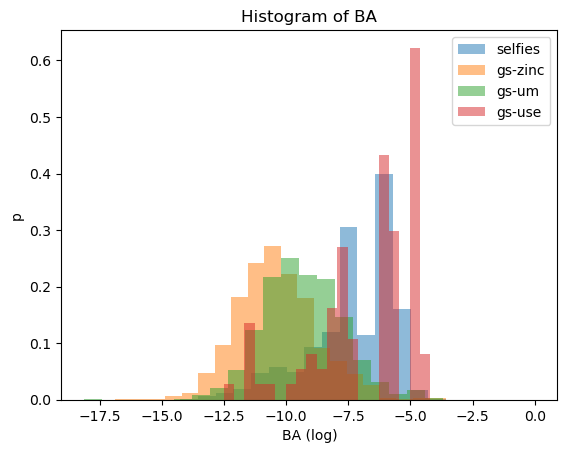

In [75]:
plt.figure()
plt.title("Histogram of BA")
plt.hist(np.log(props_sf[(props_sf[:,1]<5.5) & (props_sf[:,2]>0.4), 0]), 20, alpha=0.5, density=True, label="selfies")
plt.vlines()
plt.hist(np.log(props_gs_zinc[(props_gs_zinc[:,1]<5.5) & (props_gs_zinc[:,2]>0.4), 0]), 20, alpha=0.5, density=True, label="gs-zinc")
plt.hist(np.log(props_gs_um[(props_gs_um[:,1]<5.5) & (props_gs_um[:,2]>0.4), 0]), 20, alpha=0.5, density=True, label="gs-um")
plt.hist(np.log(props_gs_use[(props_gs_use[:,1]<5.5) & (props_gs_use[:,2]>0.4), 0]), 20, alpha=0.5, density=True, label="gs-use")
plt.xlabel("BA (log)")
plt.ylabel("p")
plt.legend()
plt.show()

In [ ]:
ss = ["CC[C@H](C)CN(C)[C@@H]1CC(=O)c2sc(OC(=O)[C@H](C)NC(C)=O)nc2C1", 
      "[CH]C1(P[C@](C)(O)[C@H](C)CC)CC(=O)c2sc(Br)nc2C1", 
      "CC[C@@H](C)[C@@](C)(O)c1nn(Br)c2c1C(=O)C[C@H](Br)C2"]

for s in ss:
    score_smile(s)

# RXN testing

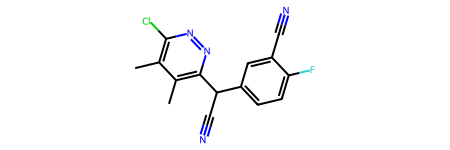

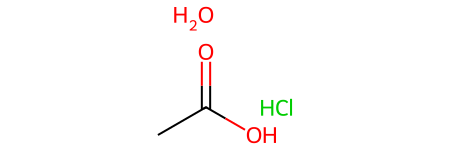

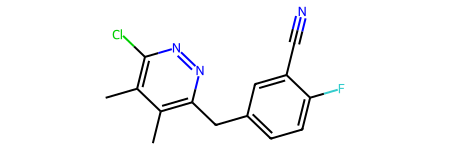

In [40]:
rxn = "Cc1c(Cl)nnc(C(C#N)c2ccc(F)c(C#N)c2)c1C>CC(=O)O.Cl.O>Cc1c(Cl)nnc(Cc2ccc(F)c(C#N)c2)c1C"
display(Chem.MolFromSmiles(rxn.split(">")[0]))
display(Chem.MolFromSmiles(rxn.split(">")[1]))
display(Chem.MolFromSmiles(rxn.split(">")[2]))

In [31]:

rxn.split(">")[0].split(".") + rxn.split(">")[2].split(".")

['Cc1c(Cl)nnc(C(C#N)c2ccc(F)c(C#N)c2)c1C', 'Cc1c(Cl)nnc(Cc2ccc(F)c(C#N)c2)c1C']

100%|██████████| 2/2 [00:00<00:00,  5.62it/s]


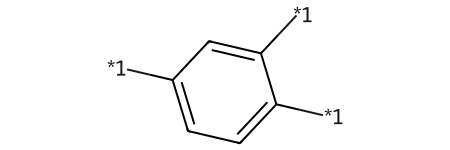

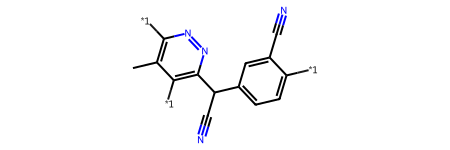

In [45]:
frags = fragment_mols(rxn.split(">")[0].split(".") + rxn.split(">")[2].split(".") , convert=True, method='mmpa', n_limit=1, target=1)
for frag in frags:
    display(Group(f'frag{2}', frag).mol)

In [35]:
fragments

['C1=C(*1)C=C(*1)C(*1)=C1',
 'CC1=C(*1)N=NC(C(C#N)C2=CC=C(*1)C(C#N)=C2)=C1*1',
 'CC1=C(*1)N=NC(*1)=C1*1',
 'CC1=C(C(C2=CC=C(*1)C(*1)=C2)*1)N=NC(Cl)=C1*1',
 'CC1=C(C(C#N)*1)N=NC(*1)=C1*1',
 'CC1=C(*1)N=NC(C(C#N)C2=CC=C(F)C(*1)=C2)=C1*1',
 'CC1=C(C(C2=CC=C(*1)C(C#N)=C2)*1)N=NC(*1)=C1*1',
 'N#CC1=CC(C(C#N)*1)=CC=C1*1',
 'CC1=C(Cl)N=NC(C(C#N)C2=CC=C(*1)C(*1)=C2)=C1*1',
 'ClC1=C(*1)C(*1)=C(*1)N=N1',
 'CC1=C(*1)N=NC(C(C#N)*1)=C1*1',
 'N#CC1=CC(*1)=CC=C1*1',
 'CC1=C(*1)N=NC(CC2=CC=C(*1)C(C#N)=C2)=C1*1',
 'CC1=C(C(C#N)C2=CC=C(*1)C(C#N)=C2)N=NC(*1)=C1*1',
 'CC1=C(*1)N=NC(CC2=CC=C(F)C(*1)=C2)=C1*1',
 'N#CC1=CC(C(C2=C(*1)C(*1)=C(*1)N=N2)*1)=CC=C1F',
 'N#CC(C1=CC=C(*1)C(*1)=C1)*1',
 'CC1=C(Cl)N=NC(CC2=CC=C(*1)C(*1)=C2)=C1*1',
 'CC1=C(Cl)N=NC(C(*1)*1)=C1C',
 'CC1=C(C(C#N)C2=CC=C(F)C(*1)=C2)N=NC(*1)=C1*1',
 'CC1=C(CC2=CC=C(*1)C(*1)=C2)N=NC(*1)=C1C',
 'N#CC1=CC(C(C2=C(*1)C(*1)=C(Cl)N=N2)*1)=CC=C1*1',
 'N#CC(C1=CC=C(F)C(*1)=C1)C1=C(*1)C(*1)=C(Cl)N=N1',
 'CC1=C(C(C2=CC=C(F)C(*1)=C2)*1)N=NC(*1)=C1*1',
 

In [96]:
from rdkit.Chem import BRICS

list(BRICS.BRICSDecompose(Chem.MolFromSmiles("CCc1cc(CN2C(=O)c3ccccc3C2=O)ccc1OC")))

['[16*]c1ccc([16*])c([16*])c1',
 '[8*]C[8*]',
 '[8*]CC',
 '[10*]N1C(=O)c2ccccc2C1=O',
 '[3*]OC']

In [95]:
!ls ~/Downloads

ls: /Users/vineet/Downloads: Operation not permitted


In [88]:
filtered_list

['C1=Cc2cccc(-n3cccc3)c2C1',
 'COC(=O)CC(=O)C(C)Oc1ccc(Oc2ccc(C(F)(F)F)cc2Cl)cc1',
 'Nc1nc(N)c2nc(CN3CCN(Cc4ccc(Cl)cc4)CC3)nnc2n1',
 'CC(C)(C)OC(=O)N1CCN(c2ccc(B(O)O)cc2)CC1',
 'COC(=O)/C=C/c1ccc(OC2=C(c3ccc(OC)cc3)S(=O)c3cc(OC)ccc32)cc1',
 'COC(=O)c1cc(OCC(F)F)ccc1N',
 'CC(C)n1ncnc1-c1cn2c(n1)-c1ccc(-c3cn[nH]c3)cc1OCC2',
 'COc1cc(Cl)nc2c1ncn2Cc1cccc(C(F)(F)F)c1C',
 'CCc1cc(CN2C(=O)c3ccccc3C2=O)ccc1OC',
 'O=c1ccccn1-c1ccc2ncnc(Nc3ccc(Cl)c(Cl)c3)c2c1',
 'O=C(O)c1ccccc1CCC(O)c1cccc(OC2CCCCO2)c1',
 'COc1cc(C(=O)c2ccccc2)ccn1',
 'Nc1cc(N2CCN(C3CCS(=O)(=O)C3)CC2)ncn1',
 'CCCCCCCCCCCCOc1ccc(CO)cc1',
 'CC(C)CCOc1cccc2c1C(=O)CC(c1nnn[nH]1)O2',
 'Cc1ccc(CN2CCC(N)CC2)cc1',
 'c1ccc(Cn2c3c(c4cc(-c5ccc(OCc6nnn[nH]6)cc5)ccc42)CCCC3)cc1',
 'CC(C)(C)OC(=O)N1C(=O)C(C(=O)O)C[C@@H]1c1cccc(C(F)(F)F)c1',
 'O=[N+]([O-])c1cnc2cc(CO)ccc2c1',
 'Nc1ccc(-c2ccccc2)cc1N',
 'CN(C)C(c1ccccc1)C1CCCCC1(O)c1cccc(F)c1',
 'Cn1ncc2cc(Oc3ccc([N+](=O)[O-])cn3)ccc21',
 'O=C(CCSC1=CC(=NS(=O)(=O)c2cccs2)c2ccccc2C1=O)NC1CC1',
 

In [99]:
csv = "data/USPTO_MIT.csv"
prod_list = []
with open(csv, "r") as f:
    ls = f.readlines()
    for l in ls[1:]:
        rxn = l.strip()
        prods = rxn.split(">")[2].split(".")
        prod_list.extend(prods)

In [100]:
len(list(set(prod_list)))

437821

(array([3.55370e+04, 1.84299e+05, 1.61929e+05, 4.87670e+04, 6.24900e+03,
        8.34000e+02, 1.44000e+02, 3.30000e+01, 2.20000e+01, 7.00000e+00]),
 array([  1. ,  21.2,  41.4,  61.6,  81.8, 102. , 122.2, 142.4, 162.6,
        182.8, 203. ]),
 <BarContainer object of 10 artists>)

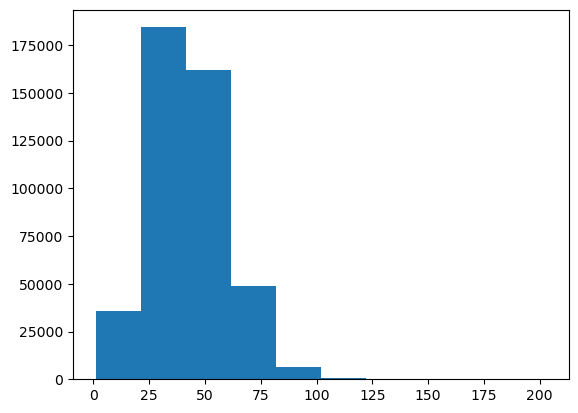

In [101]:
plt.hist([len(x) for x in list(set(prod_list))])

# TOKENIZATION

In [102]:

fragments = fragment_mols(list(set(prod_list)), convert=True, method='default')
vocab_fragment = dict([(f'frag{idx}', Group(f'frag{idx}', frag)) for idx, frag in enumerate(fragments)])
grammar = GroupGrammar(vocab=vocab_fragment)
grammar.to_file('tokens/um_gs_grammar.txt')

100%|██████████| 437821/437821 [1:17:22<00:00, 94.31it/s] 


In [ ]:

fragments = fragment_mols(, convert=True, method='default')
vocab_fragment = dict([(f'frag{idx}', Group(f'frag{idx}', frag)) for idx, frag in enumerate(fragments)])
grammar = GroupGrammar(vocab=vocab_fragment)
grammar.to_file('tokens/um_gs_grammar.txt')

In [85]:
len(fragments)

79

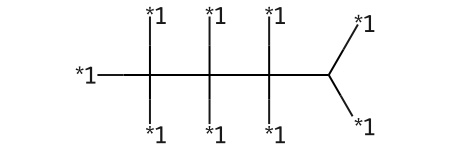

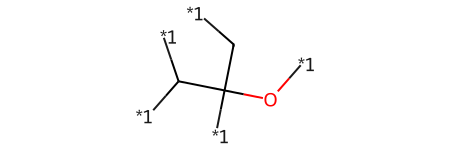

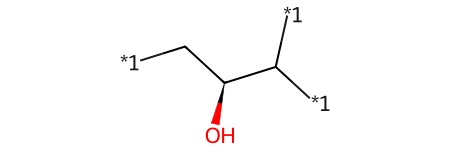

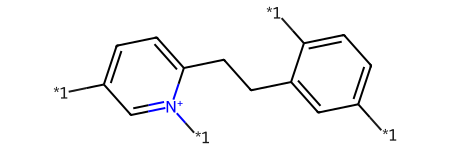

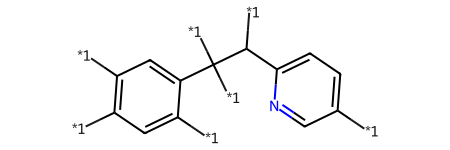

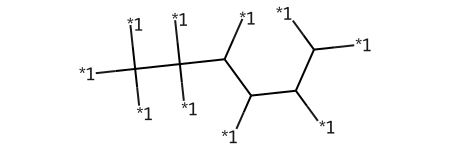

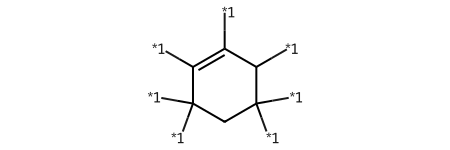

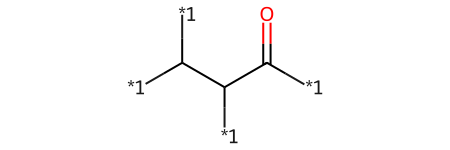

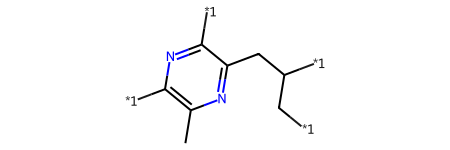

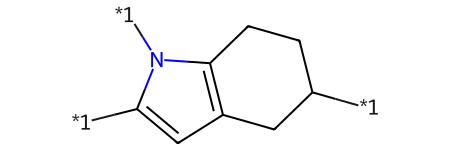

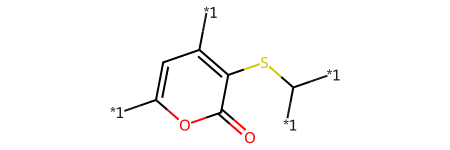

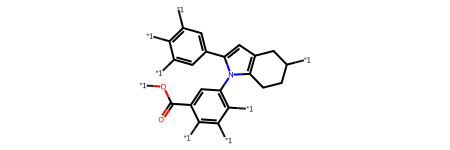

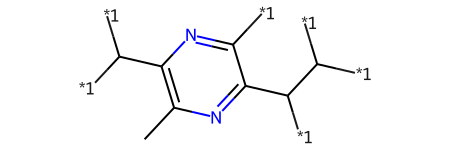

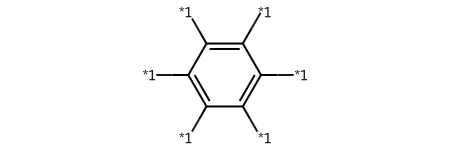

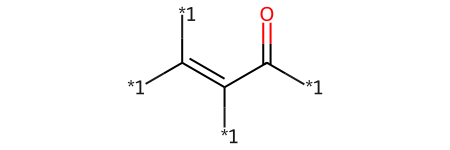

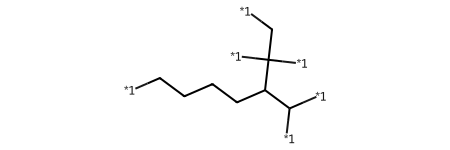

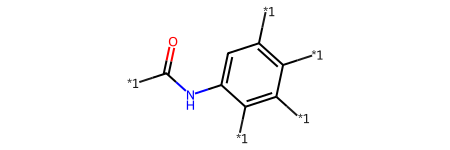

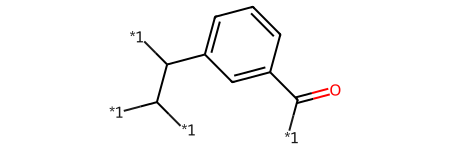

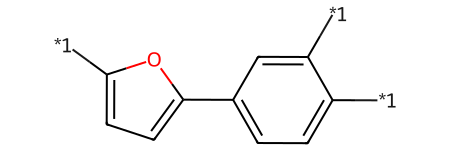

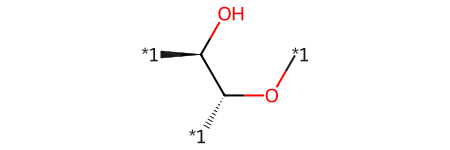

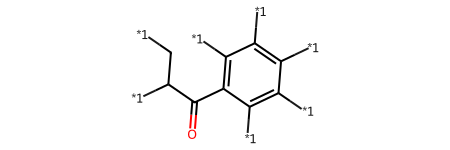

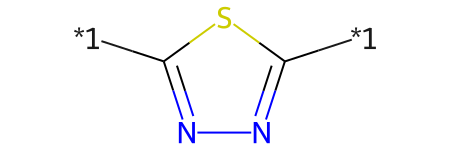

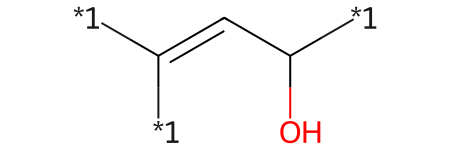

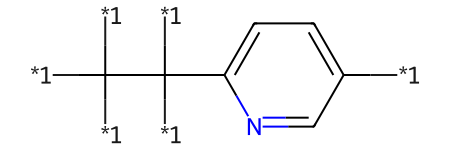

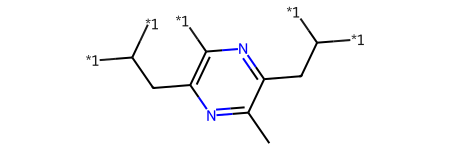

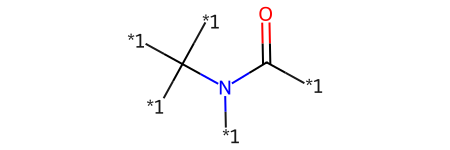

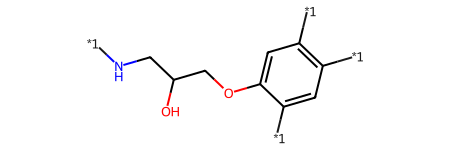

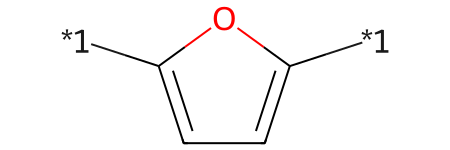

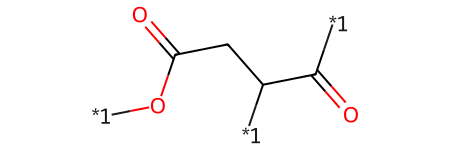

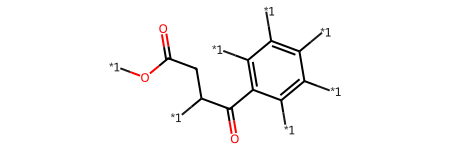

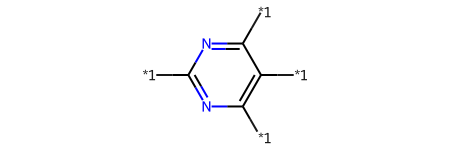

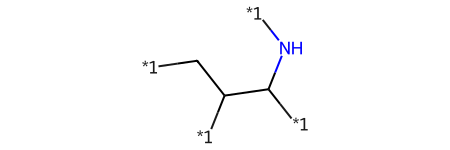

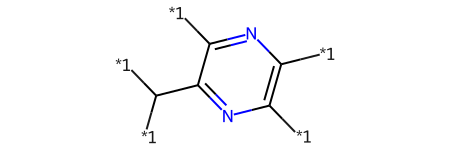

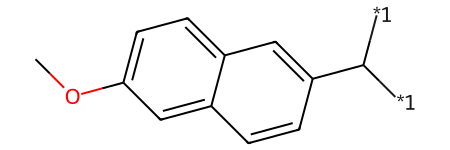

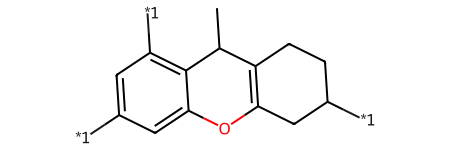

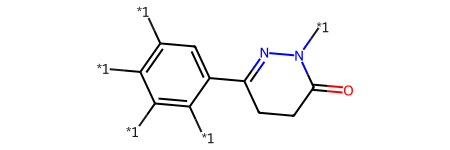

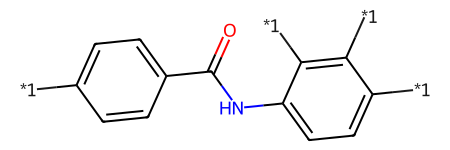

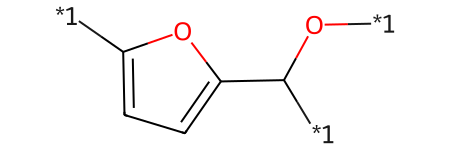

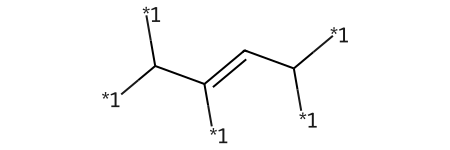

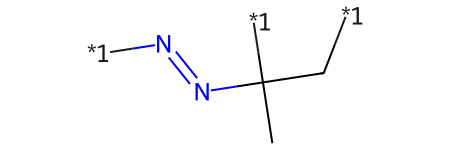

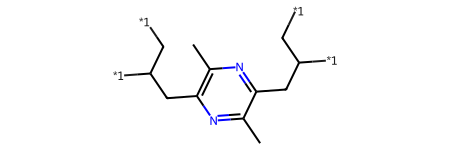

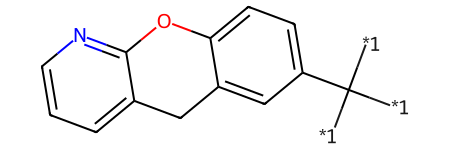

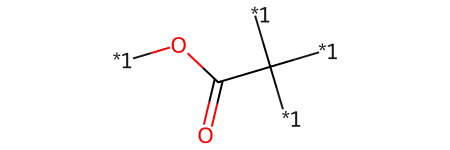

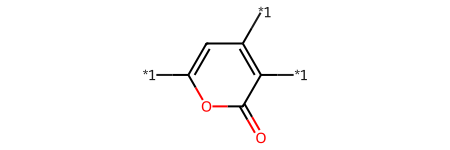

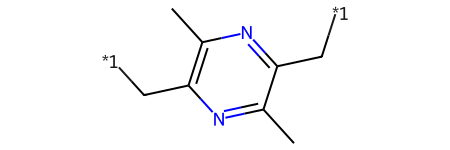

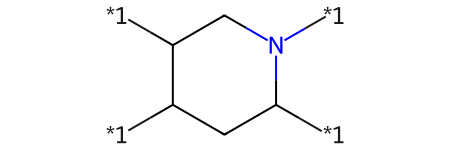

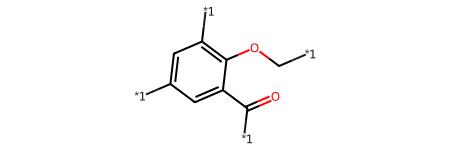

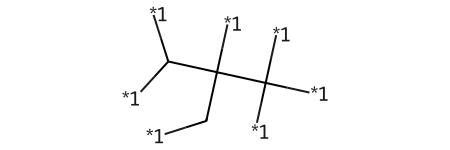

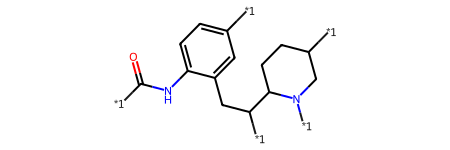

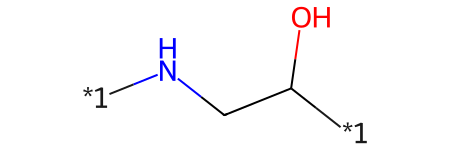

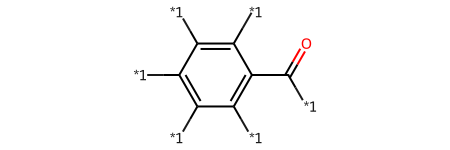

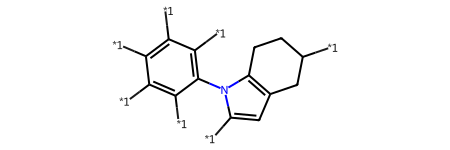

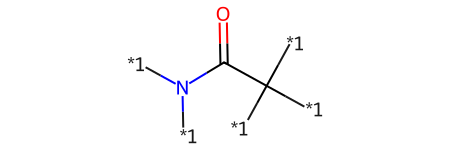

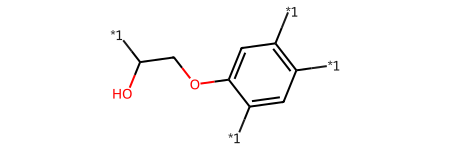

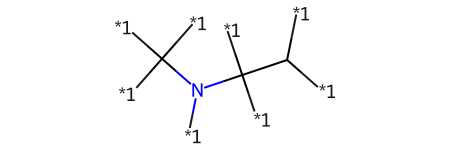

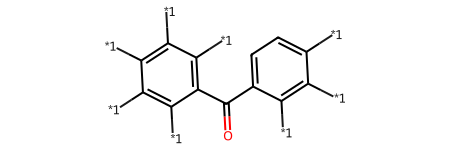

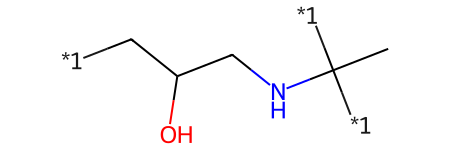

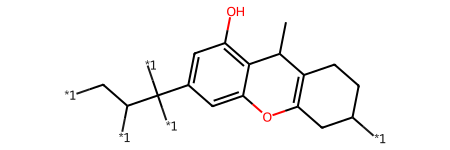

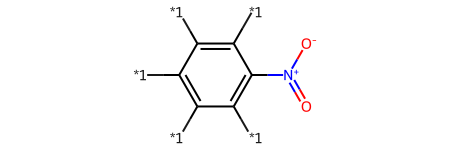

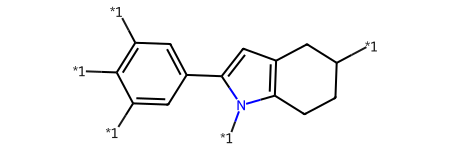

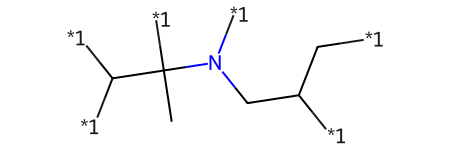

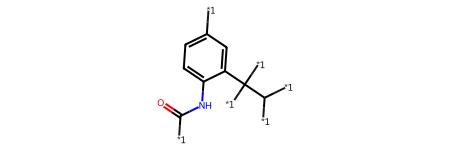

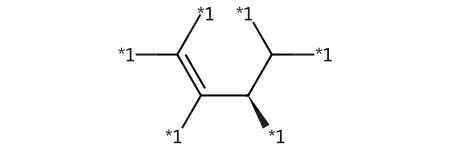

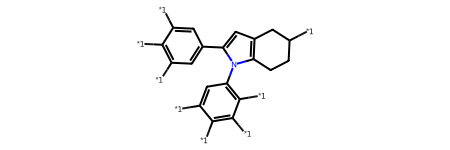

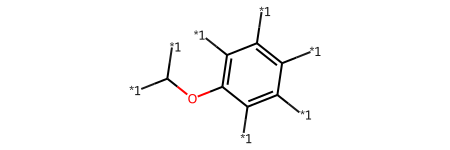

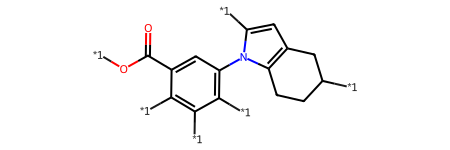

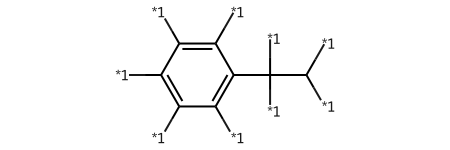

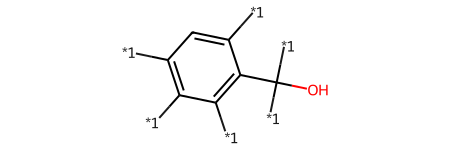

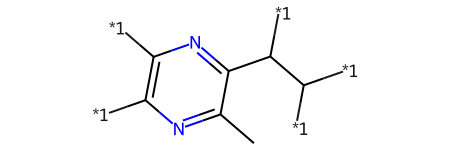

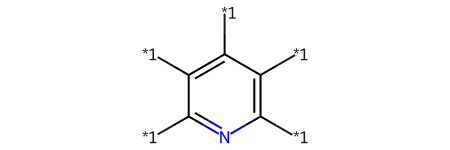

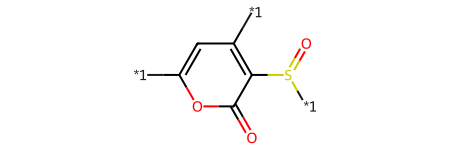

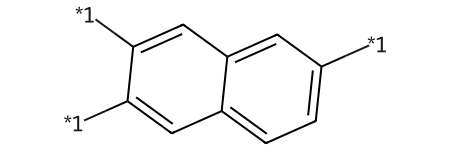

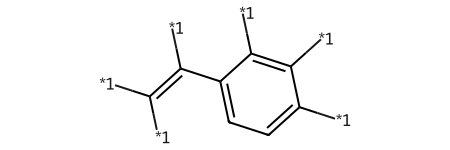

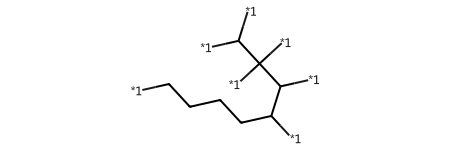

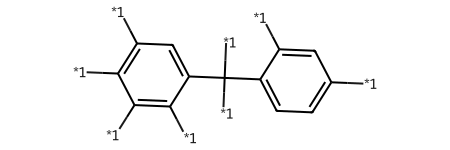

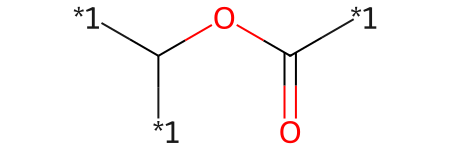

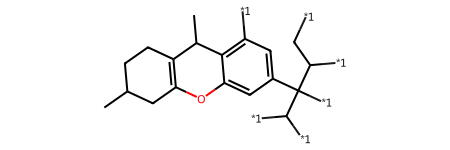

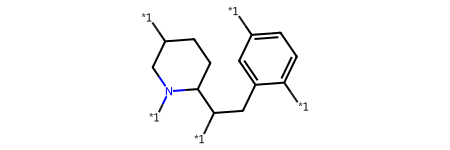

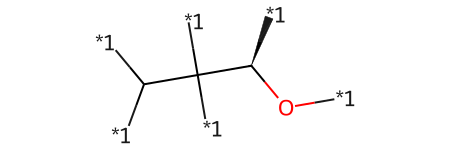

In [75]:
groups = [Group("i", f) for f in fragments]
for g in groups:
    display(g.mol)

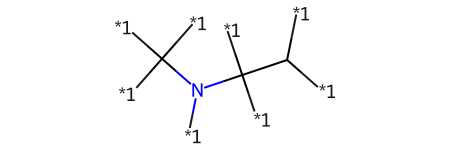

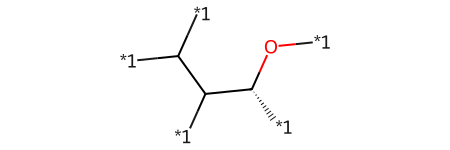

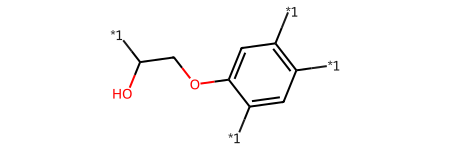

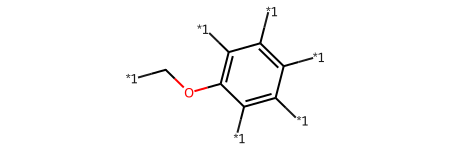

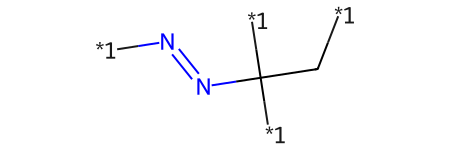

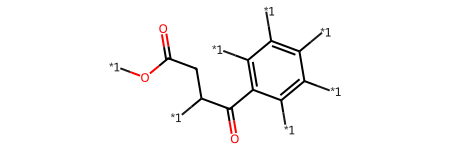

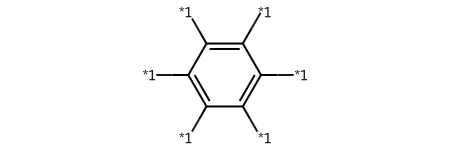

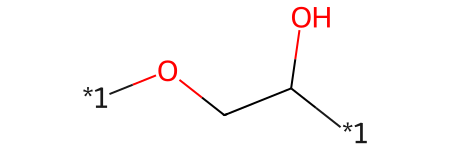

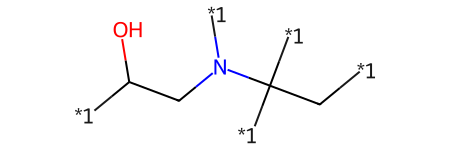

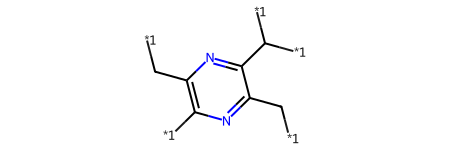

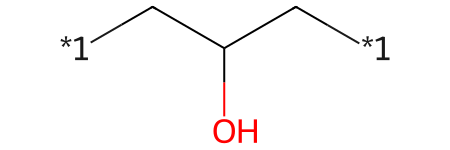

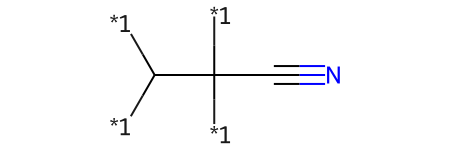

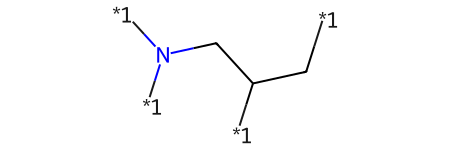

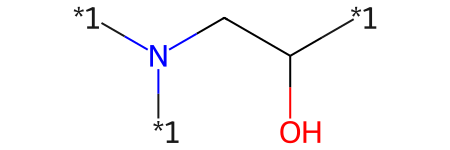

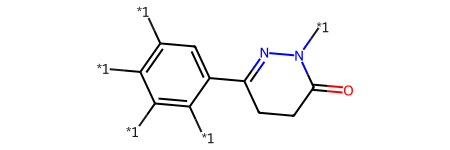

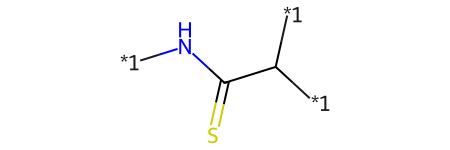

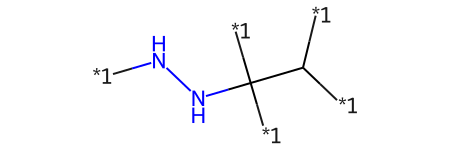

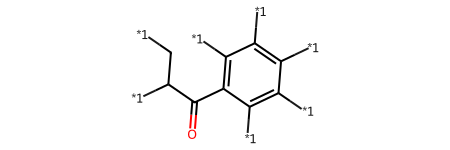

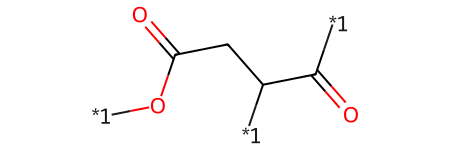

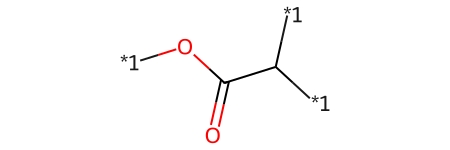

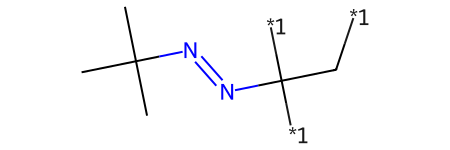

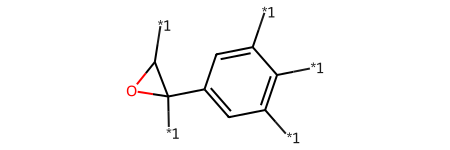

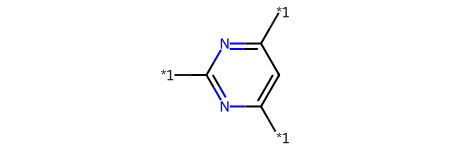

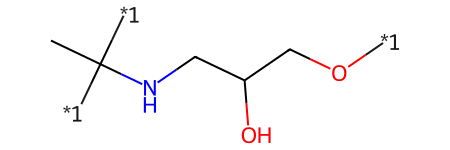

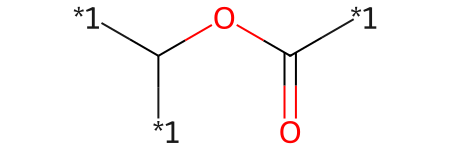

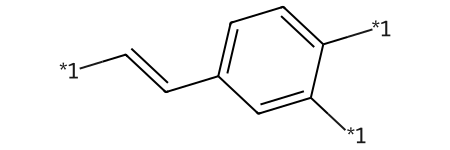

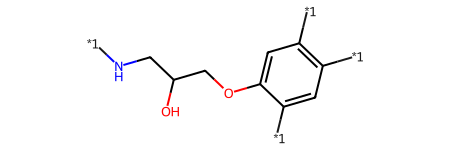

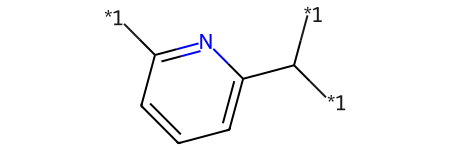

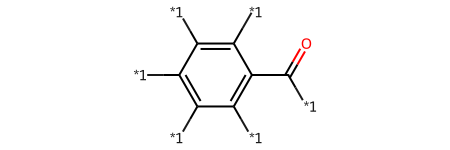

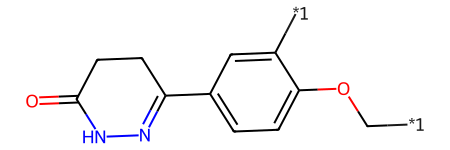

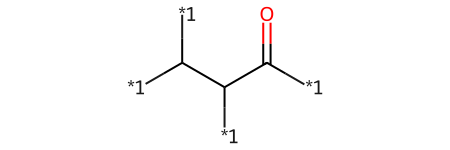

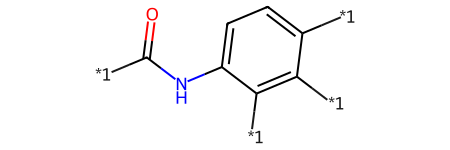

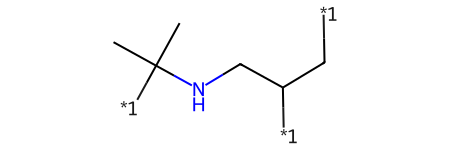

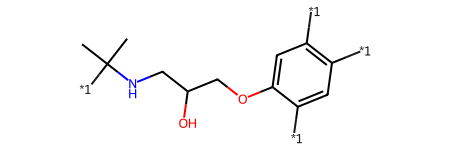

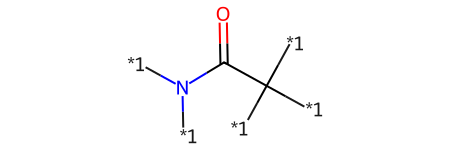

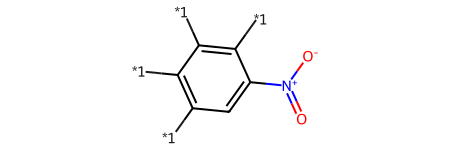

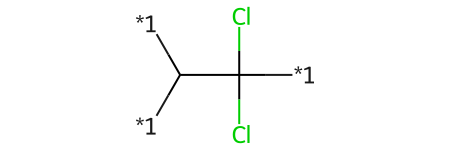

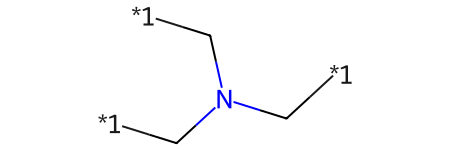

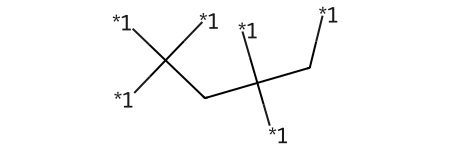

In [62]:
groups = [Group("i", f) for f in fragments]
for g in groups:
    display(g.mol)

# REACTION TEMPLATES

In [ ]:
def clean_smarts(x):
    return Chem.MolFromSmiles(sf.decoder(sf.encoder(Chem.MolToSmiles(Chem.MolFromSmarts(x)))))

In [ ]:
display(clean_smarts("[CH0;$(C-[#6]):1]"))
display(clean_smarts("[NH0:2]"))

display(clean_smarts("[C:1]1=[N:2]-N-N=N-1"))

In [ ]:
rxn_string = "[CH3:14][NH2:15].[N+:1](=[O:2])([O-:3])[c:4]1[cH:5][c:6]([C:7](=[O:8])[OH:9])[cH:10][cH:11][c:12]1[Cl:13].[OH2:16]>>[N+:1](=[O:2])([O-:3])[c:4]1[cH:5][c:6]([C:7](=[O:8])[OH:9])[cH:10][cH:11][c:12]1[NH:15][CH3:14]"

for x in rxn_string.split(">>"):
    for u in x.split("."):
        display(Chem.MolFromSmiles(sf.decoder(sf.encoder(u))))

# VAE TESTING

In [18]:
x = pickle.load(open("property_models/sa_gs_zinc_x", "rb"))

In [19]:
x

tensor([[0.0032, 0.0032, 0.0034,  ..., 0.0034, 0.0034, 0.0034],
        [0.0032, 0.0032, 0.0034,  ..., 0.0034, 0.0033, 0.0033],
        [0.0033, 0.0033, 0.0034,  ..., 0.0034, 0.0033, 0.0032],
        ...,
        [0.0032, 0.0032, 0.0034,  ..., 0.0033, 0.0034, 0.0033],
        [0.0033, 0.0032, 0.0034,  ..., 0.0034, 0.0034, 0.0033],
        [0.0032, 0.0033, 0.0034,  ..., 0.0035, 0.0034, 0.0034]])

In [15]:
import torch
from src.models import *

vae = VAE(max_len=75, vocab_len=304, latent_dim=1024, embedding_dim=64).to(torch.device("cpu"))
vae.load_state_dict(torch.load(f'vae_gs_zinc.pt'))
vae.eval()   
torch.exp(vae.decode(torch.randn(10, 1024))).std()

tensor(0.0001, grad_fn=<StdBackward0>)

In [14]:
vae = VAE(max_len=72, vocab_len=108, latent_dim=1024, embedding_dim=64).to(torch.device("cpu"))
vae.load_state_dict(torch.load(f'vae_selfies.pt'))
vae.eval()   
torch.exp(vae.decode(torch.randn(10, 1024))).std()

tensor(0.0839, grad_fn=<StdBackward0>)

In [2]:
from src.models import *
vae = VAE(max_len=72, vocab_len=108, latent_dim=1024, embedding_dim=64).to(torch.device("cpu"))
vae.decode(torch.randn(10, 1024)).mean()

tensor(-4.6958, grad_fn=<MeanBackward0>)